# Project: No Show Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will be analyzing which factors can help us best predict if a patient will not show up for their appointment. This data is from Brazil and contains 100K+ medical appointments. This data set has dates, Gender, PatientIds/Age, AppointmentIds, Reason for Vist, Scholarship Information, and No-Show encoding. 

> I will be looking at the age of the patients, whether or not they have a scholarship, and their gender to detemine what factors cause no shows.

> Here are some of my key questions:
* Is there a certain age where no-shows are more frequent?
* Does having a scholarship lessen the chance of a no-show?
* Do male or females have the higher no show rate?


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("ticks")
#this is for matplotlib to show up

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappt.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape #rows and columns

(110527, 14)

>My data set has 110,527 appointments and 14 rows.

In [4]:
df.info() #look for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Oh cool! No missing data! However, the scheduledDay and AppointmentDay columns should be datetime rather than strings

In [5]:
df.AppointmentID.nunique() #checking for unique Appointment IDs

110527

>I have no duplicate appointments becasue I have 110,527 rows and 100,527 unique Appointment IDs.

In [6]:
df.PatientId.nunique() #checking for unique patients

62299

>We are looking over appointment data from 62,299 people.

### Data Cleaning
>While coming up with questions, it has become clear that we don't need to use every column in this data set. Since every row has no nulls/incomplete data, we probably don't *have* to remove columns we don't need. However, this is good practice. We will be droping the PatientId, AppointmentID, ScheduledDay, AppointmentDay, Neighbourhood, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received.

In [7]:
df.head(0) #for column names

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


>We are getting the coulmn names so we can easily spell everything correctly.

In [8]:
df.drop(['ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'SMS_received', 'PatientId', 'AppointmentID', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis=1, inplace = True)
df.head(0)

,Gender,Age,Scholarship,No-show


>We now only have the columns we need. Lets check to make sure our data is in the correct format.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
Gender         110527 non-null object
Age            110527 non-null int64
Scholarship    110527 non-null int64
No-show        110527 non-null object
dtypes: int64(2), object(2)
memory usage: 3.4+ MB


>Why are most of these ints? They were probably boolean but change to ints. 0 is False and 1 is True. If a patient had a 0 in the Scholarship columns, that would indicate that this person does not have a scholarship

>Lets make sure all our column names work out. The hyphen in 'No-show' might our only promblem. Lets check it out.

>We will have to rename this coulmn real quick

In [10]:
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head(0)

,Gender,Age,Scholarship,No_show


In [11]:
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [12]:
df.head()

,Gender,Age,Scholarship,No_show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


>Looking at our updated dataset, it looks like we are ready to start our analysis!

<a id='eda'></a>
## Exploratory Data Analysis

>Before we answer a question, let's find the overall no show percentage

In [13]:
no_show = df.No_show.value_counts()

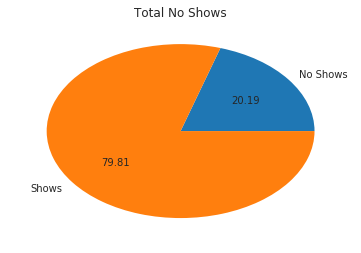

In [14]:
values = [no_show.Yes, no_show.No] 
labels = ['No Shows', 'Shows']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Total No Shows');

>Our total no show percentage (without any factors) is 20.19%.

### Are there certain ages where no-shows are more frequent?

In [15]:
mean_age = df.Age.mean()
mean_age

37.088874211731067

>Our mean age is 37.09 years old. We will now try and find what is the average age of no shows.

In [16]:
yes = df.No_show == 'Yes'
no = df.No_show == 'No'

In [17]:
df.Age[yes].mean()

34.317666562121957

In [18]:
df.Age[no].mean()

37.790064393252315

>Our average age of a no show is 34.32 and the average age for people which show up is 37.79. Lets look at the distrbution of both cases.

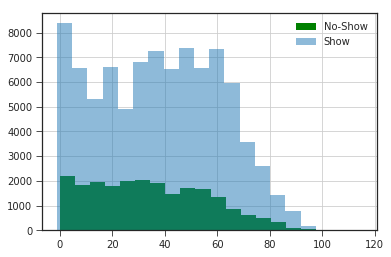

In [19]:
df.Age[yes].hist(alpha = 1, bins = 20, label = 'No-Show', color = 'green')
df.Age[no].hist(alpha = 0.5, bins = 20, label = 'Show')
plt.legend();

>This visualization shows that younger people often don't show up to their appointments, However, by using proportions, we can see which age group really has the highest no-show percentage

>We will use quartiles as our age categories.

In [20]:
df.describe()

,Age,Scholarship
count,110527.000000,110527.000000
mean,37.088874,0.098266
std,23.110205,0.297675
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,1.000000


>Our age groups will be 0-18, 18-37, 37-55, and 55-115.

In [21]:
df_018 = df.query('Age >= 0 and Age < 18') #query ages from 0 to 18
df_018.head()

,Gender,Age,Scholarship,No_show
3,F,8,0,No
15,F,15,0,No
21,F,4,0,Yes
22,M,13,0,Yes
27,F,4,0,No


In [22]:
df_1837 = df.query('Age >= 18 and Age < 37') #query ages from 18 to 37
df_1837.head()

,Gender,Age,Scholarship,No_show
6,F,23,0,Yes
8,F,21,0,No
9,F,19,0,No
10,F,30,0,No
11,M,29,0,Yes


In [23]:
df_3755 = df.query('Age >= 37 and Age < 55')# query ages from 37 to 55
df_3755.head()

,Gender,Age,Scholarship,No_show
7,F,39,0,Yes
14,F,54,0,No
16,M,50,0,No
17,F,40,1,Yes
19,F,46,0,No


In [24]:
df_55115 = df.query('Age >= 55 and Age <= 115') #query ages from 55 through 115
df_55115.head()

,Gender,Age,Scholarship,No_show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
4,F,56,0,No
5,F,76,0,No


>Lets see the age breakdown by percentage.

In [25]:
age1 = df_018.No_show.value_counts()
age1 = age1.No + age1.Yes
age2 = df_1837.No_show.value_counts()
age2 = age2.No + age2.Yes
age3 = df_3755.No_show.value_counts()
age3 = age3.No +age3.Yes
age4 = df_55115.No_show.value_counts()
age4 = age4.No + age4.Yes
age4

28929

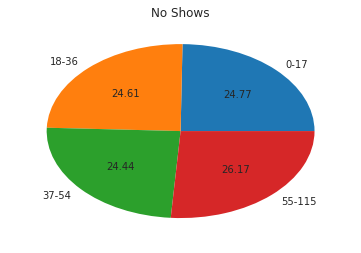

In [26]:
values = [age1, age2, age3, age4] 
labels = ['0-17', '18-36', '37-54', '55-115' ]
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('No Shows');

>Our the size of our age intervals are all pretty similar. It is good to know one interval isn't being dominant. 
>We now have our age range data frames and can now calculate the proportion of no shows at each age.

In [27]:
count = df_018.No_show.value_counts() # find value counts
total = count.No + count.Yes # total ammount of appointments
p_No18 = (count.Yes/total) * 100 # percentage of appointments which were no shows
p_No18

21.903648781913144

In [28]:
count = df_1837.No_show.value_counts() # find value counts
total = count.No + count.Yes # total ammount of appointments
p_No37 = (count.Yes/total) * 100 # percentage of appointments which were no shows
p_No37

23.698720776356417

In [29]:
count = df_3755.No_show.value_counts() # find value counts
total = count.No + count.Yes # total ammount of appointments
p_No55 = (count.Yes/total) * 100 # percentage of appointments which were no shows
p_No55

19.67498334197083

In [30]:
count = df_55115.No_show.value_counts() # find value counts
total = count.No + count.Yes # total ammount of appointments
p_No115 = (count.Yes/total) * 100 # percentage of appointments which were no shows
p_No115

15.762729441045318

In [31]:
print('For ages 0 - 18 we see a ',p_No18, '% no show rate')
print('For ages 18 - 37 we see a ',p_No37, '% no show rate')
print('For ages 37 - 55 we see a ',p_No55, '% no show rate')
print('For ages 55 - 115 we see a ',p_No115, '% no show rate')

For ages 0 - 18 we see a  21.9036487819 % no show rate
For ages 18 - 37 we see a  23.6987207764 % no show rate
For ages 37 - 55 we see a  19.674983342 % no show rate
For ages 55 - 115 we see a  15.762729441 % no show rate


>Let's visualize and draw a conclusion!

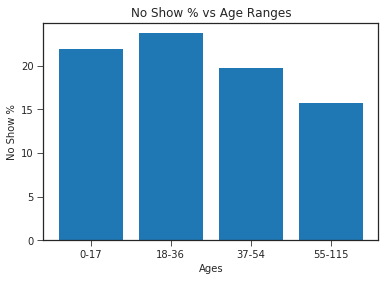

In [32]:
labels = ['0-17', '18-36', '37-54', '55-115']
plt.bar(labels, [p_No18, p_No37, p_No55, p_No115])
plt.ylabel('No Show %')
plt.xlabel('Ages')
plt.title('No Show % vs Age Ranges');

>Using our visualization, we can clearly see that people between ages 18-37 have a higher chance of no showing up for an appointment. The next highest is ages 0-18. 

### Does having a scholarship lessen the chance of a no show?

>Let first see how many appointments were paid by a scholarship.

In [33]:
scholar = df.Scholarship.value_counts().tolist() #value counts to list
scholar[1]

10861

>We have 10,861 appointments where someone was on scholarship. While we have duplicate patients, it isn't necessary to find how many unique scholarships were used. Let's contiune to find whether or not scholarships matter with regaurd to no-shows.

In [34]:
totalApps = scholar[0] + scholar[1]
totalApps #total number of appointments

110527

In [35]:
df_no = df.query('Scholarship == "0"')
df_no.head()

,Gender,Age,Scholarship,No_show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


In [36]:
df_schol = df.query('Scholarship == "1"')
df_schol.head()

,Gender,Age,Scholarship,No_show
12,F,22,1,No
17,F,40,1,Yes
18,F,30,1,No
31,M,12,1,Yes
33,F,38,1,No


>I selected all of the appointments with/without scholarships. I can no find the number and % of no shows to answer my question.

In [37]:
count_tot = df_no.No_show.value_counts() # find value counts
total_tot = count_tot.No + count_tot.Yes # total ammount of appointments
p_No = (count_tot.Yes/total_tot) * 100 # percentage of appointments which were no shows
p_No

19.807155900708366

In [38]:
count_sch = df_schol.No_show.value_counts() # find value counts
total_sch = count_sch.No + count_sch.Yes # total ammount of appointments
p = (count_sch.Yes/total_sch) * 100 # percentage of appointments which were no shows
difference = count_tot.Yes - count_sch.Yes
difference , p

(17163, 23.73630420771568)

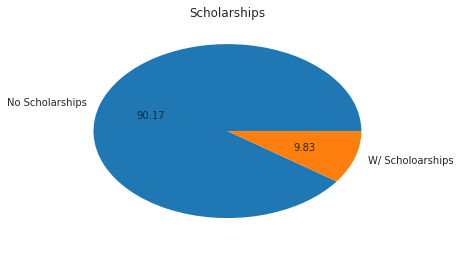

In [39]:
values = [total_tot, total_sch] 
labels = ['No Scholarships', 'W/ Scholoarships']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Scholarships');

>90% of appointments aren't paid for with a scholarship.

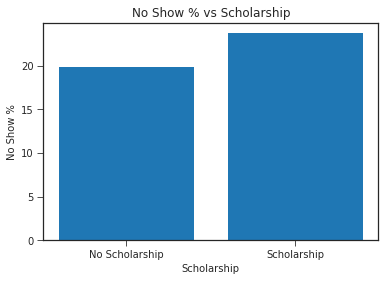

In [40]:
labels = ['No Scholarship', 'Scholarship']
plt.bar(labels, [p_No, p])
plt.ylabel('No Show %')
plt.xlabel('Scholarship')
plt.title('No Show % vs Scholarship');

>I'm actually surpirsed that appointments made with a scholarship have a higher no show percentage. 

>I'm interested in seeing how much of the total no shows are from people with scholarships.

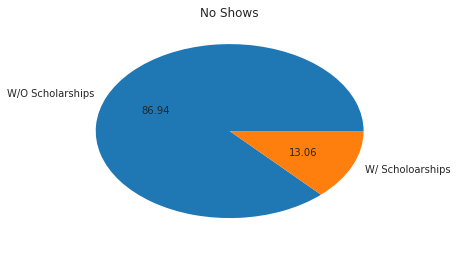

In [41]:
values = [difference, count_sch.Yes] 
labels = ['W/O Scholarships', 'W/ Scholoarships']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('No Shows');

>Among the patients who have a scholarship, there is a higher percentage of no shows. (19.8% vs 23.7%)

>However, the amount of no shows with scholarships only make up about 13% of the total no shows.

>To answer our question: Scholarships do not lower the chances of a no show, according to our findings.

### Does gender affect no shows?

>Let's first look at the gender values and make a conclusion from that.

In [42]:
gender  = df.Gender.value_counts()
gender

F    71840
M    38687
Name: Gender, dtype: int64

>We have two values, M and F. What percentage of the total is each gender?

In [43]:
total_Male = (gender.M/(gender.M + gender.F) * 100) # % male
total_Male

35.00230712857492

In [44]:
total_Female = (100 - total_Male) #male and female are mutually exclusive so 1-male gives us female %
total_Female

64.997692871425073

In [45]:
check =total_Male + total_Female # check for 100%
check

100.0

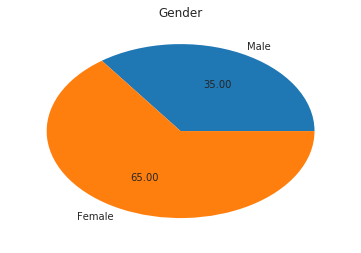

In [46]:
values = [total_Male, total_Female] 
labels = ['Male','Female']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Gender');

>Our dataset shows 35% of the appointments are for males, and 65% are for females.

In [47]:
df_m = df.query('Gender == "M"') #get only M appointments
df_f = df.query('Gender == "F"') #get onyl F appointments

>We have the genders separtated into different data frames. We will calculate the porportion of no shows from each gender and comapre

In [48]:
male_NS = df_m.No_show.value_counts() # number of no shows
male_NS

No     30962
Yes     7725
Name: No_show, dtype: int64

In [49]:
p_Male = (male_NS.Yes / gender.M * 100) # male percentage no show, will be used later

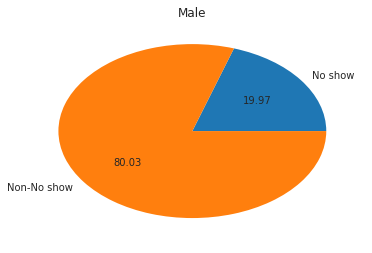

In [50]:
values = [male_NS.Yes, male_NS.No] 
labels = ['No show','Non-No show']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Male');

>Males no show 19.97% of the time

In [51]:
female_NS = df_f.No_show.value_counts() # number of no shows
female_NS

No     57246
Yes    14594
Name: No_show, dtype: int64

In [52]:
p_Female = (female_NS.Yes / gender.F * 100) # female percentage no show, will be used later

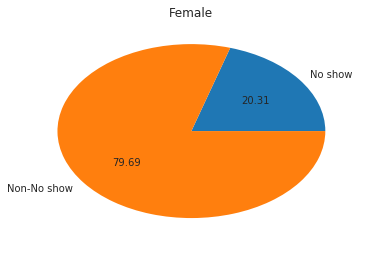

In [53]:
values = [female_NS.Yes, female_NS.No] 
labels = ['No show','Non-No show']
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Female');

>Females no show 20.31% of the time

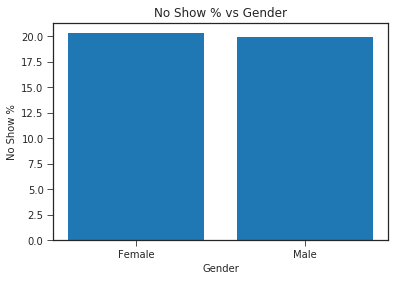

In [54]:
labels = ['Male', 'Female']
plt.bar(labels, [p_Male, p_Female])
plt.ylabel('No Show %')
plt.xlabel('Gender')
plt.title('No Show % vs Gender');

>You can tell that female's have a slightly higher no show %. It is a difference of less than .4%. This isn't a big enough difference to suggest gender and no shows have a correlation. 

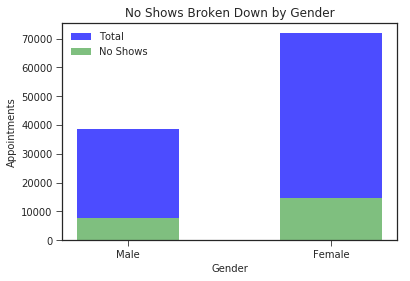

In [55]:
gender = ['Male', 'Female']
ns = np.array([male_NS.Yes, female_NS.Yes])
total = np.array([male_NS.No , female_NS.No])
ind = [x for x, _ in enumerate(gender)]

plt.bar(ind, total, width=0.5, label='Total', color='blue', bottom=ns , alpha = 0.7)
plt.bar(ind, ns, width=0.5, label='No Shows', color='green', alpha = 0.5)

plt.xticks(ind, gender)
plt.ylabel("Appointments")
plt.xlabel("Gender")
plt.legend()
plt.title("No Shows Broken Down by Gender");

>It is clear that females make more appointments and have more no shows than males. However, the rate at which male and females don't show up to their appointments is almost exactly the same. There isn't a conclusion than we can draw here. 

<a id='conclusions'></a>
## Conclusions

>The dataset I used had information from over 100k appointments in Brazil. I wanted to look at what factors affected whether or not the patient showed up to their appointment.  I chose to look at gender, age, and whether or no they had a scholarship. 
I found that age and scholarship had an effect on the rate at which patients make their appointments.

>Our overall no show rate was 20.19%. Roughly, 1 out of every 5 appointments is a no show. Will this rise or fall with age? According to my analysis, ages 0-37 have a no show rate above 20.19%. Ages 55-115 have a no show rate which is less than 20.19%. This suggests that younger patients are more likely to not show up for their appointments. 

>I found that a patient’s age is linked to the rate at which they show up for their appointment. How will their method of payment change things?

>If a patient has a scholarship that means they are on welfare and they will have their expenses covered. I don’t know much more about the program than that. It would be interesting to know how much a no show would affect this people.

>Far more people are not on scholarship than are. 90% of appointments were not paid with a scholarship.  In my analysis, I saw that 23.7% of patients, who are on scholarship, don’t show up for their appointments. Whereas 19.8% of patients who pay for their own appointments don’t show. This is interesting for sure.  The scholarship no show rate is the highest out of any factor I measured. I would be interesting in learning more about what a ‘scholarship’ is. 

>My final inquiry was whether or not the patient’s gender made a difference in the rate at which the patients show up. After seeing that the no show rates for males and females has only a .4% difference, I don’t see a correlation between gender and no shows. 

>My findings are not perfect and can’t be guaranteed to be 100% true. We don’t have access to all of appointments from the beginning of time to now, and we aren’t sure that this correlation will continue.  However, these percentages do suggest that patients under 37 and those with a scholarship tend to not show up more frequently than others.
